In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from quantum_systems import ODQD, GeneralOrbitalSystem

In [20]:
l = 10
grid_length = 10
num_grid_points = 2001
omega = 0.25

odho = ODQD(
    l, grid_length, num_grid_points, a=0.25, alpha=1, potential=ODQD.HOPotential(omega)
)

\begin{align}
    \epsilon_i = \hbar \omega \left(i + \frac{1}{2}\right)
\end{align}

In [21]:
np.diag(odho.h)

array([0.1249998 +0.j, 0.37499902+0.j, 0.62499748+0.j, 0.87499542+0.j,
       1.12499515+0.j, 1.37501276+0.j, 1.62513397+0.j, 1.87570984+0.j,
       2.12783907+0.j, 2.38410631+0.j])

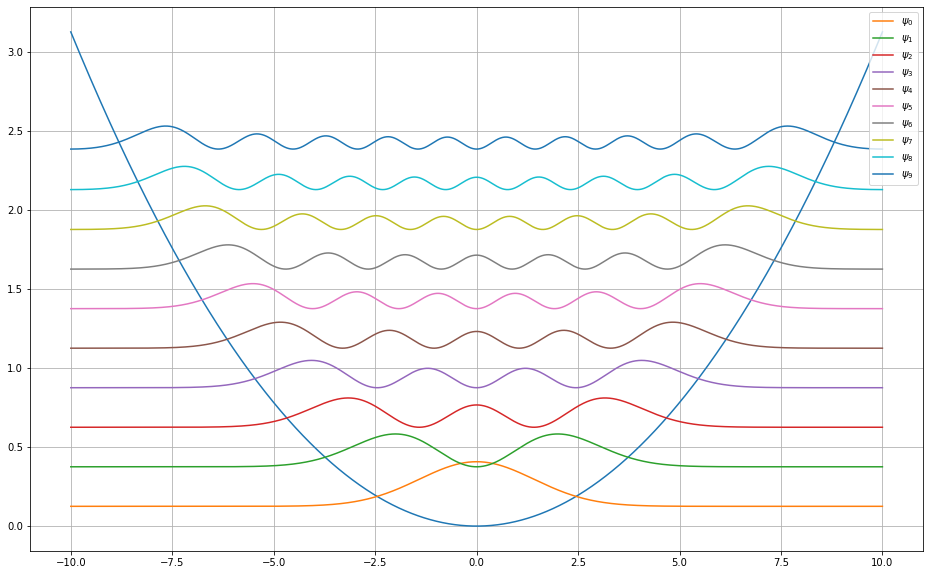

In [22]:
fig = plt.figure(figsize=(16, 10))

plt.plot(odho.grid, ODQD.HOPotential(omega)(odho.grid))

for i in range(l):
    plt.plot(
        odho.grid,
        np.abs(odho.spf[i]) ** 2 + odho.h[i, i].real,
        label=r"$\psi_{" + f"{i}" + r"}$",
    )

plt.grid()
plt.legend()
plt.show()

In [23]:
print(f"l = {odho.l}")
print(f"grid shape = {odho.grid.shape}")
print(f"h shape = {odho.h.shape}")
print(f"u shape = {odho.u.shape}")
print(f"x shape = {odho.position.shape}")
print(f"spf shape = {odho.spf.shape}")

l = 10
grid shape = (2001,)
h shape = (10, 10)
u shape = (10, 10, 10, 10)
x shape = (1, 10, 10)
spf shape = (10, 2001)


In [25]:
system = GeneralOrbitalSystem(n=2, basis_set=odho)

In [26]:
print(f"l = {system.l}")
print(f"grid shape = {system._basis_set.grid.shape}")
print(f"h shape = {system.h.shape}")
print(f"u shape = {system.u.shape}")
print(f"x shape = {system.position.shape}")
print(f"spf shape = {system.spf.shape}")

l = 20
grid shape = (2001,)
h shape = (20, 20)
u shape = (20, 20, 20, 20)
x shape = (1, 20, 20)
spf shape = (20, 2001)


__Note:__ `system.u` in the `GeneralOrbitalSystem` are the anti-symmetric Coulomb matrix elements.